In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US=df[df['job_country']=='United States']

In [5]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [6]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='Skill_count')

df_skills_count.sort_values(by='Skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,Skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [7]:
#list of job titles
job_titles = df_skills_count['job_title_short'].unique().tolist()

#list of the top 3 JOB TITLES
job_titles = sorted(job_titles[:3])



job_titles



['Data Analyst', 'Data Engineer', 'Data Scientist']

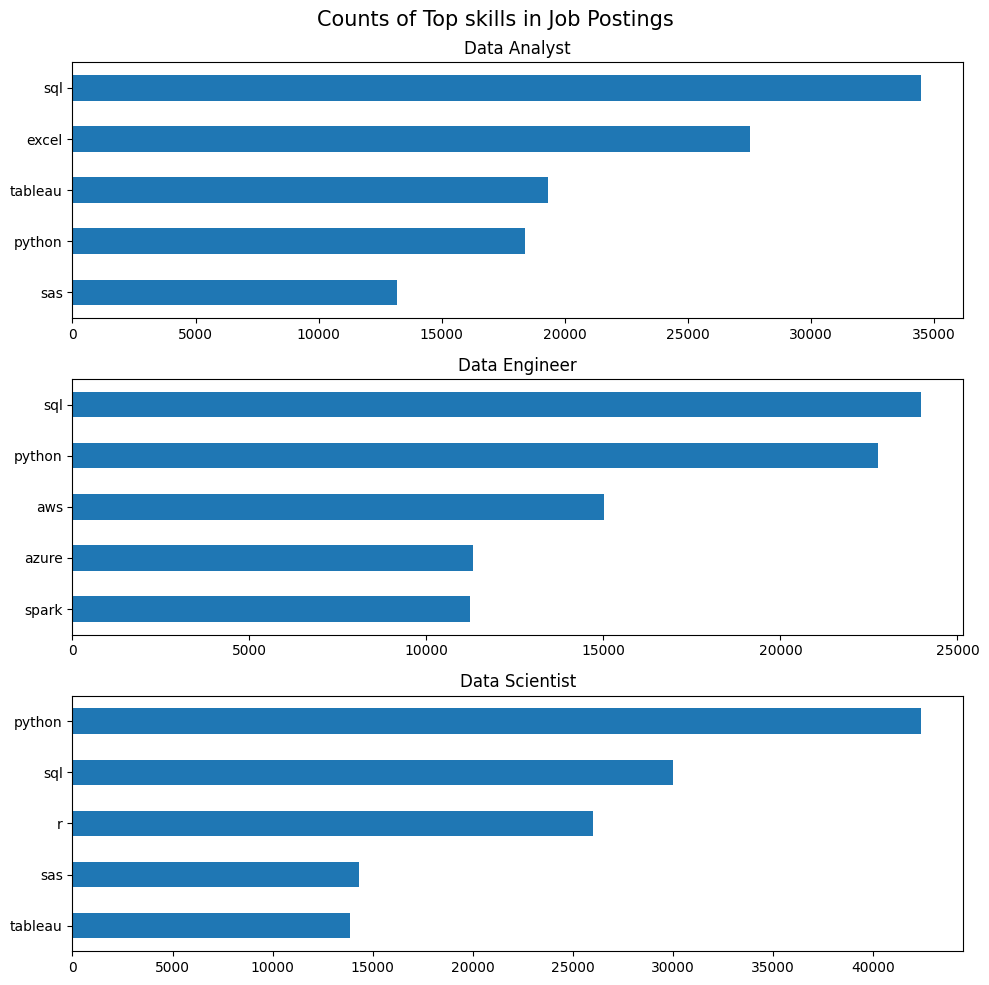

In [8]:
fig, ax = plt.subplots(len(job_titles),1,figsize=(10,10))
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='Skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of Top skills in Job Postings', fontsize=15)
plt.tight_layout()
    

In [9]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

df_job_title_count

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [10]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_perc'] = 100 * df_skills_perc['Skill_count']/df_skills_perc['job_total']

df_skills_perc



,job_skills,job_title_short,Skill_count,job_total,skill_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


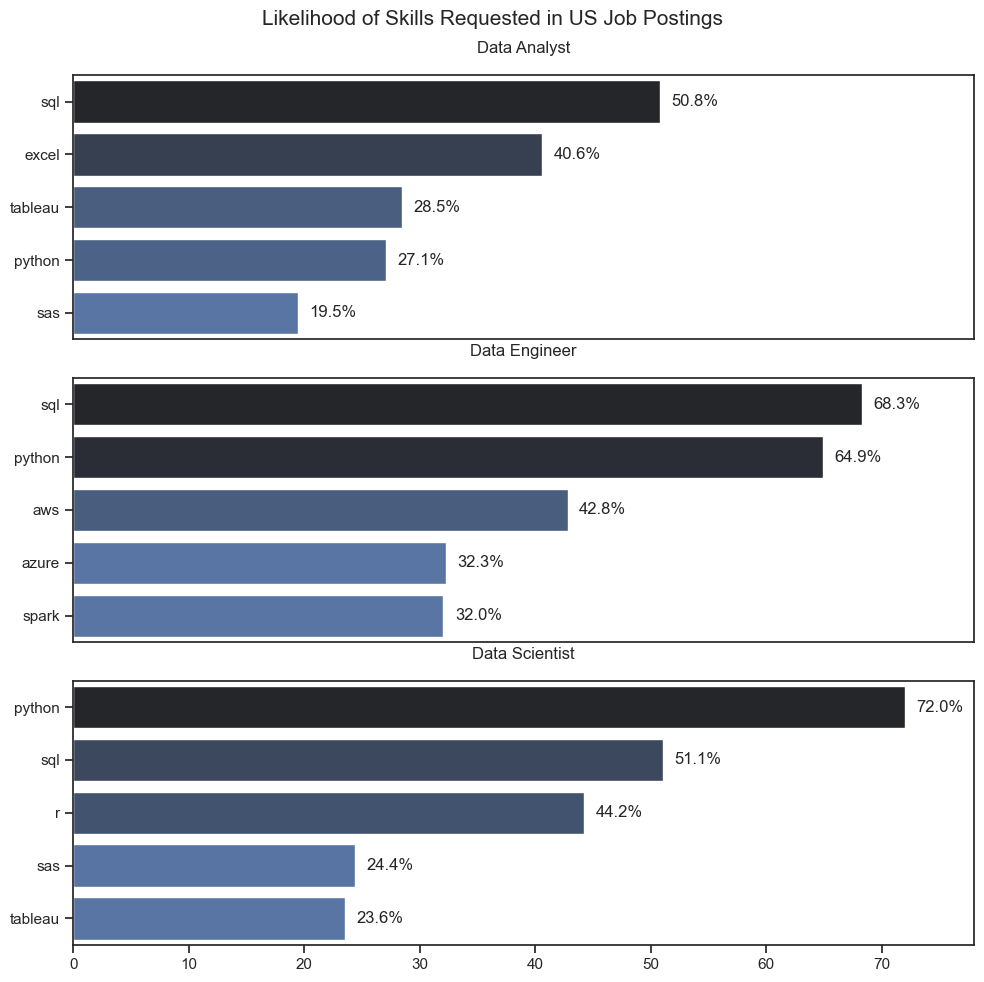

In [12]:
fig, ax = plt.subplots(len(job_titles),1,figsize=(10,10))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    #df_plot.plot(kind='barh',x='job_skills',y='skill_perc',ax=ax[i],title=job_title)

    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='Skill_count', palette='dark:b_r')

  
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)

    # JOB TITLE
    ax[i].text(0.5, 1.1, job_title, ha='center'
    , va='center', transform=ax[i].transAxes, fontsize=12)
    

    for n, value in enumerate(df_plot['skill_perc']):
        ax[i].text(value + 1, n, f'{value:.1f}%', va='center')

    if i!=len(job_titles)-1:     
        ax[i].set_xticks([])
    
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()